In [138]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [139]:
np.random.seed(23)

In [140]:
mu_vec1= np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,50)

In [141]:
df = pd.DataFrame(class1_sample,
                 columns=["f1","f2","f3"])

In [142]:
df["target"] = 1

In [143]:
mu_vec1= np.array([1,1,1])
cov_mat1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,50)

In [144]:
df1 = pd.DataFrame(class1_sample,
                 columns=["f1","f2","f3"])
df1["target"] = 0

In [145]:
df = df.append(df1,ignore_index=True)

In [146]:
df =df.sample(100)
df

,f1,f2,f3,target
72,0.148464,0.953550,0.975727,0
19,-0.992574,-0.161346,1.192404,1
34,-0.822939,-1.598109,0.226512,1
14,0.420623,0.411620,-0.071324,1
56,0.761077,0.462601,-0.768855,0
...,...,...,...,...
57,-0.443831,1.093450,2.793003,0
54,1.873059,-0.630962,0.809947,0
11,1.968435,-0.547788,-0.679418,1
10,1.415320,0.457711,0.728876,1


In [147]:
import plotly.express as px

fig = px.scatter_3d(df,x = df["f1"],
                   y = df["f2"],
                   z = df["f3"],
                   color = df["target"].astype("str"))

In [149]:
fig.update_traces(marker=dict(size=8,
                             line = dict(width=1,
                                        color = "DarkSlateGrey")),
                 selector=dict(mode="markers"))
fig.show()

In [150]:
# step 1 : 
# apply standard scaling 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [151]:
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [152]:
# step 2 : find covariance matrix 

covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,3]])

In [153]:
covariance_matrix

array([[ 1.01010101,  0.29937982, -0.21826783],
       [ 0.29937982,  1.01010101, -0.23852525],
       [-0.21826783, -0.23852525,  0.25252525]])

In [154]:
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [155]:
eigen_values

array([1.4003945 , 0.7110454 , 0.16128737])

In [156]:
eigen_vectors

array([[ 0.67666905,  0.71550859,  0.17368494],
       [ 0.68462704, -0.69823742,  0.20916577],
       [-0.27093323,  0.0226266 ,  0.96233218]])

Populating the interactive namespace from numpy and matplotlib


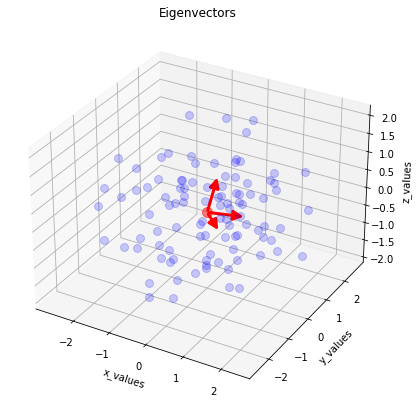

In [157]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['f1'], df['f2'], df['f3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['f1'].mean()], [df['f2'].mean()],
        [df['f3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['f1'].mean(),
                 v[0]], [df['f2'].mean(),
                         v[1]], [df['f3'].mean(),
                                 v[2]], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [158]:
pc = eigen_vectors[0:2]
pc

array([[ 0.67666905,  0.71550859,  0.17368494],
       [ 0.68462704, -0.69823742,  0.20916577]])

In [159]:
np.dot(df.iloc[:,0:3],pc.T)

array([[ 2.06805826e-01, -3.97671956e-01],
       [-1.20602997e+00, -3.43509967e-01],
       [-2.22176705e+00,  5.00169148e-01],
       [-1.62932066e-01, -8.81441973e-02],
       [-3.61620160e-02, -5.01264906e-02],
       [-1.17870210e+00, -1.22493542e+00],
       [-3.36921360e-01,  1.53346231e-01],
       [-2.66715728e-01, -2.56567654e-01],
       [-1.02932217e-01, -1.33292331e+00],
       [ 8.81312147e-01,  3.59071417e-01],
       [-9.62595938e-01,  3.29898165e-01],
       [ 2.93799778e-01,  1.40342884e+00],
       [-3.61082442e-02, -7.93960753e-01],
       [ 1.63018728e+00, -1.23053284e+00],
       [ 1.32582253e+00,  1.70009748e-01],
       [-1.15434816e+00,  1.97421219e-01],
       [ 3.32369106e-01,  4.04911604e-01],
       [ 9.87417158e-01,  6.07057530e-01],
       [ 1.19361714e+00, -9.57457850e-01],
       [-1.83800159e-01, -1.27458095e+00],
       [ 2.49275781e-01, -1.22795088e+00],
       [-1.58257331e+00, -1.09882830e+00],
       [-4.73430515e-01, -6.49080577e-02],
       [ 1.

In [160]:
new_df = pd.DataFrame(np.dot(df.iloc[:,0:3],pc.T),columns=["pc1","pc2"])
new_df

,pc1,pc2
0,0.206806,-0.397672
1,-1.206030,-0.343510
2,-2.221767,0.500169
3,-0.162932,-0.088144
4,-0.036162,-0.050126
...,...,...
95,0.240746,-0.489409
96,0.190979,1.679421
97,0.053432,1.381580
98,0.619191,0.668204


In [161]:
new_df["target"] = df["target"].values

In [162]:
new_df

,pc1,pc2,target
0,0.206806,-0.397672,0
1,-1.206030,-0.343510,1
2,-2.221767,0.500169,1
3,-0.162932,-0.088144,1
4,-0.036162,-0.050126,0
...,...,...,...
95,0.240746,-0.489409,0
96,0.190979,1.679421,0
97,0.053432,1.381580,1
98,0.619191,0.668204,1


In [163]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['pc1'],
                 y=new_df['pc2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()